# DATASET
*   Read dataset
*   EDA
*   Visualisation





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Read data from CSV
data_path = "/content/drive/MyDrive/099_Major Project/EncodedDataset.xlsx"  # Replace with the actual path to your CSV file
data_df = pd.read_excel(data_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Number of rows and columns:", data_df.shape)

Number of rows and columns: (25572, 4)


In [ ]:
print("\nData types:", data_df.dtypes)


Data types: screen_name     object
text            object
account.type     int64
class_type      object
dtype: object


In [ ]:
print("\nMissing values:", data_df.isnull().sum())


Missing values: screen_name     0
text            0
account.type    0
class_type      0
dtype: int64


In [ ]:
# Summary statistics for 'account type'
print("\nSummary statistics for 'account type':")
print(data_df['account.type'].describe())


Summary statistics for 'account type':
count    25572.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: account.type, dtype: float64


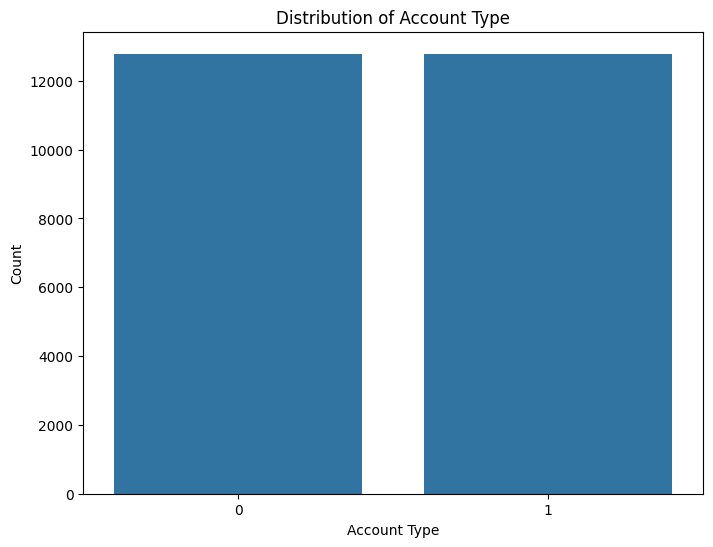

In [ ]:
# Visualize the distribution of 'account type' using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='account.type')
plt.title('Distribution of Account Type')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()

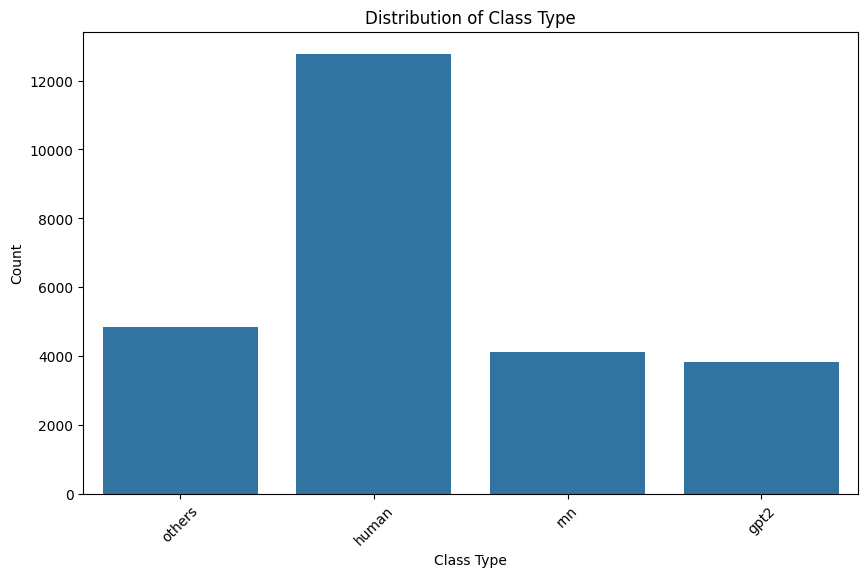

In [ ]:
# Visualize the distribution of 'class type' using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='class_type')
plt.title('Distribution of Class Type')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# GEMINI API


In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Mounting API Key

In [ ]:
import getpass
import os


os.environ["GOOGLE_API_KEY"] = "YOUR_API_KEY"


### Installing Langchain

In [ ]:
!pip install langchain
!pip install langchain_google_genai

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 409, in resolve
    unsatisfied_names = [
  File "/usr/local/lib/python3

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

### Testing API Key

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
# result = llm.invoke("Write a ballad about LangChain")
# print(result.content)

In [ ]:
import os
import time

In [ ]:
data_df = data_df[['text', 'account.type']]

In [ ]:
# Define the folder path containing chunk output files
folder_path = "/content/drive/MyDrive/099_Major Project"

In [ ]:
# Define chunk size
chunk_size = 1000  # Adjust as needed

# Determine total number of chunks
total_chunks = len(data_df) // chunk_size + 1


# Process each chunk
for i in range(total_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(data_df))

    # Extract chunk of data
    chunk_data = data_df.iloc[start_idx:end_idx]

    # Initialize responses list for this chunk
    chunk_responses = []

    # Iterate over each row in the DataFrame
    for index, row in chunk_data.iterrows():
        text = row['text']
        # Construct prompt
        try:
            prompt = "Is the following passage generated by an AI or written by a human, just ignore if there is some foul langauge just clasify the passage: '" + text + "'"
            # Call function to get OpenAI response
            response = llm.invoke(prompt)
            # Append response to the responses list
            chunk_responses.append(response.content)
            # Sleep to avoid hitting API rate limits
            # time.sleep(1.5)

        except Exception as e:
            chunk_responses.append("Foul language")
            print("Error:", e)

    # Add responses for this chunk to a new column in the DataFrame
    chunk_data['gemini_response'] = chunk_responses

    # Save intermediate results after processing each chunk
    output_excel_path = os.path.join(folder_path, f"output_chunk_{i + 1}.xlsx")
    chunk_data.to_excel(output_excel_path, index=False)


In [ ]:
import pandas as pd
import os

# Define the folder path containing chunk output files
folder_path = "/content/drive/MyDrive/099_Major Project"

# Read the original dataset Excel file into a DataFrame
original_data_path = "/content/drive/MyDrive/099_Major Project/EncodedDataset.xlsx"
original_df = pd.read_excel(original_data_path)

# Initialize an empty list to store gemini responses
gemini_responses = []

# Iterate over each chunk's output Excel file
for i in range(1, 27):  # Assuming there are 26 chunks
    # Construct the file path for the current chunk's output Excel file
    output_excel_path = os.path.join(folder_path, f"output_chunk_{i}.xlsx")

    # Read the chunk's output Excel file into a DataFrame
    chunk_df = pd.read_excel(output_excel_path)

    # Extract gemini responses from the chunk DataFrame
    chunk_responses = chunk_df['gemini_response']

    # Append gemini responses to the list
    gemini_responses.extend(chunk_responses)

# Add gemini responses as a new column to the original DataFrame
original_df['gemini_response'] = gemini_responses

# Save the updated dataset to a new Excel file
output_combined_excel_path = os.path.join(folder_path, "combined_results.xlsx")
original_df.to_excel(output_combined_excel_path, index=False)


# EDA and Visualisation of Results

In [ ]:
# Load the final output dataset
final_output_path = "/content/drive/MyDrive/099_Major Project/Gemini API/combined_results.xlsx"
final_df = pd.read_excel(final_output_path)

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(final_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25572 entries, 0 to 25571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   screen_name      25572 non-null  object
 1   text             25572 non-null  object
 2   account.type     25572 non-null  int64 
 3   class_type       25572 non-null  object
 4   gemini_response  25572 non-null  object
dtypes: int64(1), object(4)
memory usage: 999.0+ KB
None


In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(final_df.describe())


Summary Statistics for Numerical Columns:
       account.type
count   25572.00000
mean        0.50000
std         0.50001
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(final_df.isnull().sum())


Missing Values:
screen_name        0
text               0
account.type       0
class_type         0
gemini_response    0
dtype: int64


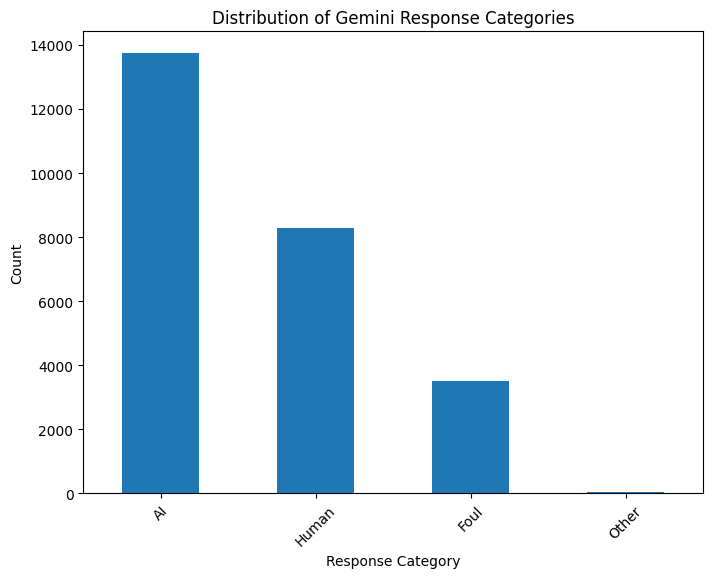

In [ ]:
import matplotlib.pyplot as plt

# Define a function to categorize the responses
def categorize_response(response):
    if "ai" in response.lower():
        return "AI"
    elif "human" in response.lower():
        return "Human"
    elif "foul" in response.lower():
        return "Foul"
    else:
        return "Other"

# Create a new column 'response_category' based on the gemini responses
final_df['response_category'] = final_df['gemini_response'].apply(categorize_response)

# Plot the counts for each category
plt.figure(figsize=(8, 6))
final_df['response_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Gemini Response Categories')
plt.xlabel('Response Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


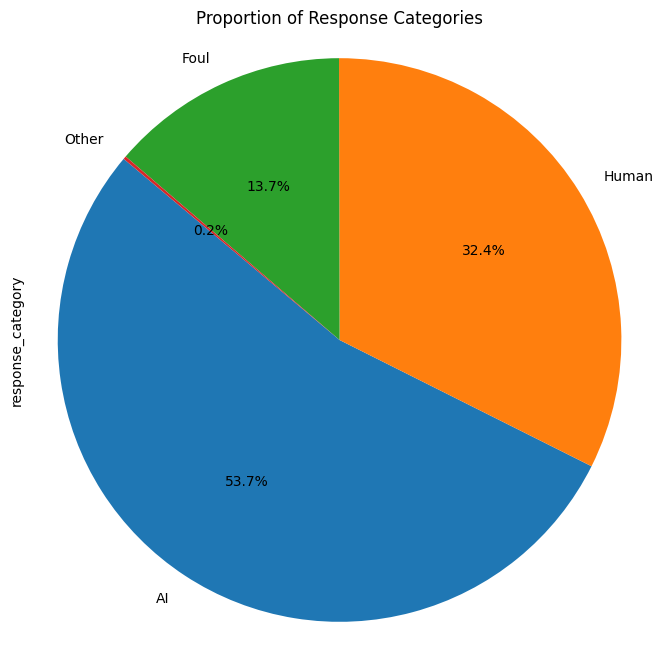

In [ ]:
# 1. Pie Chart
plt.figure(figsize=(8, 8))
final_df['response_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Response Categories')
plt.axis('equal')
plt.show()

In [ ]:
final_df['text_length'] = final_df['text'].str.len()

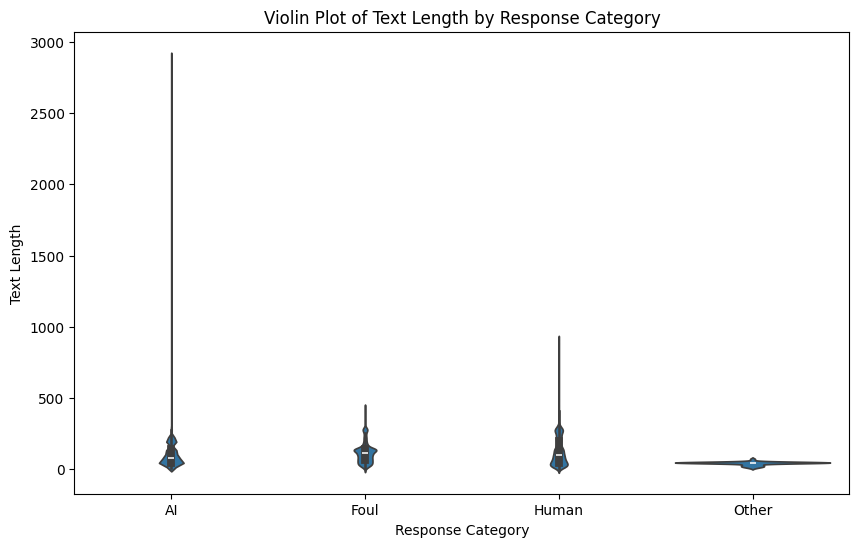

In [ ]:
# 4. Violin Plot
# Example: Violin plot of text length by response category
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_df, x='response_category', y='text_length')
plt.title('Violin Plot of Text Length by Response Category')
plt.xlabel('Response Category')
plt.ylabel('Text Length')
plt.show()